# 数据质量分析

缺失值<br>
异常值<br>
重复值<br>
一致性<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 缺失值

In [2]:
df = pd.read_csv('data.csv')
df

,name,age,salary,lang
0,Jack,18.0,8000,Python
1,Mary,NaN,7300,Java
2,Lily,21.0,11000,python
3,Tom,25.0,12000,NaN
4,Joe,81.0,-1,NaN
5,Jack,18.0,8000,Python


### 1、isnull()   &  notnull()    --  判断是否为NaN

In [3]:
df.isnull()

,name,age,salary,lang
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,True
5,False,False,False,False


In [4]:
df.isnull().sum()

name      0
age       1
salary    0
lang      2
dtype: int64

In [5]:
df.notnull().sum()

name      6
age       5
salary    6
lang      4
dtype: int64

isnull()只会将NaN判断为null，空值不会判断为null

In [6]:
df.loc[4, 'lang'] = ''
df

,name,age,salary,lang
0,Jack,18.0,8000,Python
1,Mary,NaN,7300,Java
2,Lily,21.0,11000,python
3,Tom,25.0,12000,NaN
4,Joe,81.0,-1,
5,Jack,18.0,8000,Python


In [7]:
df.isnull()          

,name,age,salary,lang
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False


### 2、判断是否为空值

In [8]:
df['lang'] == ''

0    False
1    False
2    False
3    False
4     True
5    False
Name: lang, dtype: bool

In [9]:
sum(df['lang'] == '')

1

## 异常值

In [10]:
df.describe()

,age,salary
count,5.000000,6.000000
mean,32.600000,7716.500000
std,27.208455,4219.567928
min,18.000000,-1.000000
25%,18.000000,7475.000000
50%,21.000000,8000.000000
75%,25.000000,10250.000000
max,81.000000,12000.000000


In [11]:
(df.age<16) | (df.age>60)

0    False
1    False
2    False
3    False
4     True
5    False
Name: age, dtype: bool

In [12]:
sum((df.age<16) | (df.age>60))

1

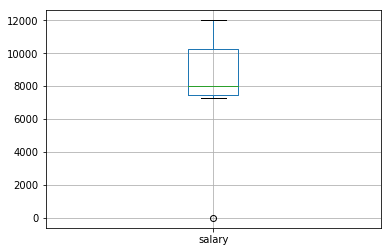

In [13]:
df[['salary']].boxplot()

## 重复值

### duplicated

In [14]:
df.duplicated()     # 默认只有一组中所有数据都与另一组相同，才会被认为是重复值    

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [15]:
df

,name,age,salary,lang
0,Jack,18.0,8000,Python
1,Mary,NaN,7300,Java
2,Lily,21.0,11000,python
3,Tom,25.0,12000,NaN
4,Joe,81.0,-1,
5,Jack,18.0,8000,Python


In [16]:
df.duplicated().sum()

1

In [17]:
df.loc[5, 'age'] = 19
df

,name,age,salary,lang
0,Jack,18.0,8000,Python
1,Mary,NaN,7300,Java
2,Lily,21.0,11000,python
3,Tom,25.0,12000,NaN
4,Joe,81.0,-1,
5,Jack,19.0,8000,Python


In [18]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [19]:
df.duplicated(subset='lang')    # 只要lang这一列相同就会被认为是重复值

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

## 一致性

In [20]:
df

,name,age,salary,lang
0,Jack,18.0,8000,Python
1,Mary,NaN,7300,Java
2,Lily,21.0,11000,python
3,Tom,25.0,12000,NaN
4,Joe,81.0,-1,
5,Jack,19.0,8000,Python


In [21]:
df.lang.unique()

array(['Python', 'Java', 'python', nan, ''], dtype=object)

上面的两个Python，一个是Python，一个是python，这就是数据不一致，导致筛选重复值时漏过